<a href="https://colab.research.google.com/github/Riverag0011/ADS-504-02-Machine-Learning-Deep-Learning-For-Data-Science/blob/main/Assignment_6_1_Exercise_GR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6.1 Exercise

Name: Gabi Rivera\
Date: 03Aug2024\
Course: ADS504-02\
Link: https://colab.research.google.com/drive/1YekMLje-GozasbofeMZhLC0sGfC6GMiX?authuser=1#scrollTo=p4Ljww9xbJtl

In this assignment, you will work on two applications of Image. First we start with how to get access to a webcam. In the second part, we will see how to use deep learning.\
OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code [http://www.opencv.org

## 1.1 Video Capturing

Let’s start with a very simple code. This code reads your webcam and shows the result.

Try to understand each line of the code and explain it in your report.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image

<IPython.core.display.Javascript object>

Saved to photo.jpg


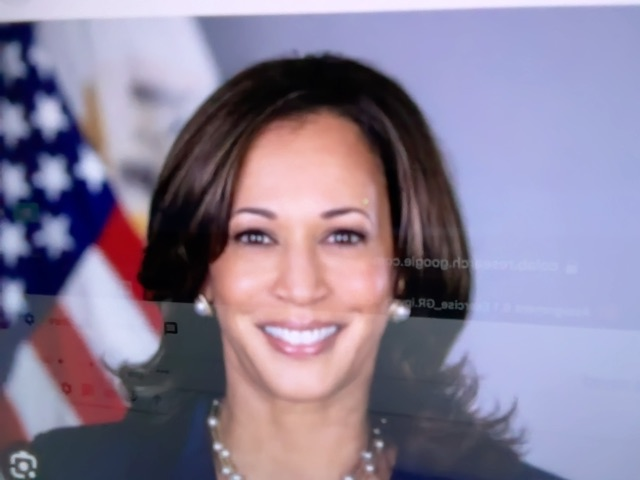

In [ ]:
# Defining a funtion take_photo with two set parameters.
def take_photo(filename='photo.jpg', quality=0.8):
    # Define the JavaScript function
    js = Javascript('''
// The js contains asynchronous function for takePhoto taking quality
        async function takePhoto(quality) {
// It has HTML elements div and button.
// A new div container is created to hold other elements.
// A new button element is created, and its text is set to 'Capture'.
// This button is then added inside the div container.
// The goal to is create a user interface for 'Capture' button to trigger an action.
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

// This creates the video element with display style to block.
            const video = document.createElement('video');
            video.style.display = 'block';
// This request access to the user's webcam and obtain the stream.
// It appends a div container and a video element to the webpage's body.
// It assigns the media stream to the video element, allowing the live webcam
// feed to be displayed in the video element on the webpage.
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
// This starts to play the video.
            await video.play();

// Resize the output to fit the video element. Resizing.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

// Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

// This creates the canvas element to be used for image capture.
// Then sets dimensions to match the video to have same resolutions.
// And retrives the current video frame onto the canvas.
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
// Stops the video stream and clean up by removing the div element from the doc.
            stream.getVideoTracks()[0].stop();
            div.remove();

// Converts the canvas content to a JPEG data URL with
// the specified quality and returns it.
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')

    # Execute JavaScript code
    display(js)

# Calls the takePhoto function with the specified quality,
# evaluates the returned data URL,
# and decodes the base64-encoded image data to binary.
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])

# Opens a file with the given filename in binary write mode
# and writes the decoded image data to the filename.
    with open(filename, 'wb') as f:
        f.write(binary)

    # Return the filename
    return filename

# Prompt to take a photo.
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
# Show the image which was just taken.
    display(Image(filename))
# Errors will be thrown if the user does not have a webcam or if they do not
# grant the page permission to access it.
except Exception as err:
    print('An error occurred:', str(err))

## 1.2 Face Recognition

Now we want to design a face recognition code using DNN. After doing 1.1 you can use the following codes:


Try to understand each line of the code and explain it in your report.

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

--2024-08-04 04:14:20--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.005s  

Last-modified header missing -- time-stamps turned off.
2024-08-04 04:14:20 (5.71 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2024-08-04 04:14:20--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

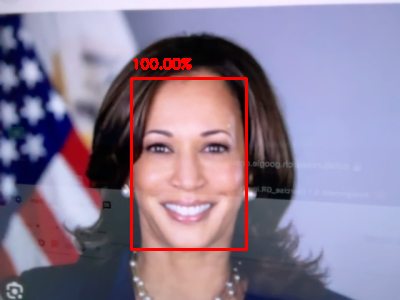

In [ ]:
# Shell command that prompts to download files.
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

# Displays when the loading process is starting.
print("[INFO] loading model...")
# Assigns the filenames of the prototxt and caffemodel files to variables.
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
# Load the pre-trained deep learning model into OpenCV
net = cv2.dnn.readNetFromCaffe(prototxt, model)

# Read the image from 1.1
image = cv2.imread(filename)

# Resize the image to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]

# Resizes the image to 300x300 pixels.
# Converts the image into a format suitable for the neural network.
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)),
                             1.0, (300, 300), (104.0, 177.0, 123.0))

# Displays that object detection is being performed.
print("[INFO] computing object detections...")
# Sets the preprocessed image (blob) as the input to the network.
net.setInput(blob)
# Runs the forward pass of the network to perform the detection.
# The result is stored containing the detected objects' details.
detections = net.forward()

# Loop for processing the detection
for i in range(0, detections.shape[2]):
# extract the confidence (i.e., probability) associated with the prediction
  confidence = detections[0, 0, i, 2]

# filter out weak detections by ensuring the `confidence` is
# greater than the minimum confidence threshold
  if confidence > 0.5:

# compute the (x, y)-coordinates of the bounding box for the object
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")

# draw the bounding box of the face along with the associated probability
    text = "{:.2f}%".format(confidence * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    cv2.putText(image, text, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)


# Display the image
cv2_imshow(image)